In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def relu(x):
    return np.maximum(0, x)

## Conceptos fundamentales

In [4]:
# Data
data = np.array([[0, 0], [0.1, 0], [0.2, 0], [0.5, 1], [0.6, 1], [0.7, 1], [0.8, 0], [0.9, 0], [1, 0]])
df = pd.DataFrame(data, columns=['Amount taken (g)', '% Effectiveness'])
df

,Amount taken (g),% Effectiveness
0,0.0,0.0
1,0.1,0.0
2,0.2,0.0
3,0.5,1.0
4,0.6,1.0
5,0.7,1.0
6,0.8,0.0
7,0.9,0.0
8,1.0,0.0


In [5]:
# Representation of our simple NN

# Upper path (green)
g_1 = 1.43 * df["Amount taken (g)"] - 0.61
t_1 = relu(g_1) * (-3.89)

# Lower path (red)
g_2 = 2.63 * df["Amount taken (g)"] - 0.27
t_2 = relu(g_2) * 1.35

# Network output
t = t_1 + t_2
upper_nn = np.array(list(zip(df["Amount taken (g)"], t_1)))
lower_nn = np.array(list(zip(df["Amount taken (g)"], t_2)))
whole_nn = np.array(list(zip(df["Amount taken (g)"], t)))

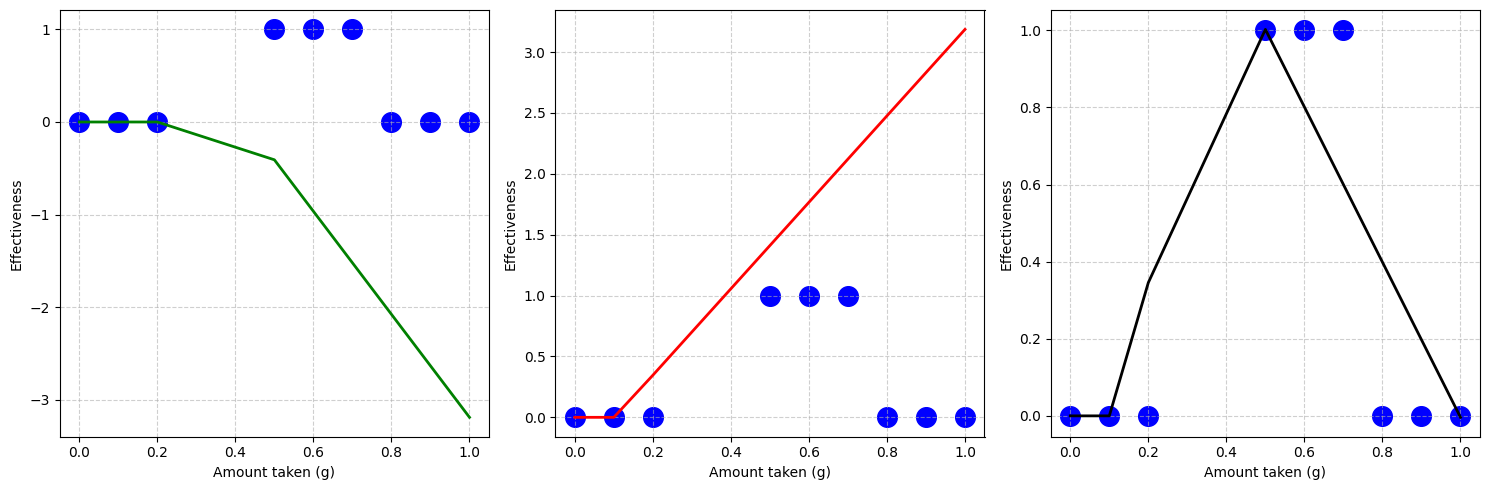

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Green path (upper)
axs[0].scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)
axs[0].plot(upper_nn[:,0], upper_nn[:,1], c="green", linestyle="-", linewidth=2)
axs[0].set_xlabel("Amount taken (g)")
axs[0].set_ylabel("Effectiveness")
axs[0].grid(True, linestyle="--", alpha=0.6)

# Red path (lower)
axs[1].scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)
axs[1].plot(lower_nn[:,0], lower_nn[:,1], c="red", linestyle="-", linewidth=2)
axs[1].set_xlabel("Amount taken (g)")
axs[1].set_ylabel("Effectiveness")
axs[1].grid(True, linestyle="--", alpha=0.6)

# Sum
axs[2].scatter(data[:,0], data[:,1], c="blue", marker="o", s=200)
axs[2].plot(df["Amount taken (g)"], t, c="black", linewidth=2)
axs[2].set_xlabel("Amount taken (g)")
axs[2].set_ylabel("Effectiveness")
axs[2].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


## Optimización weights & bias con backpropagation
